In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import pandas as pd

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


<b> Part 1

- <b> Filter the 4 largest cities into a new dataframe

In [3]:
largest_df = df[0:4].drop(columns=["RegionType"])
largest_df

,RegionID,SizeRank,RegionName,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,257207.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,235513.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,108878.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,167368.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


- <b> Melt the data to long-form and prepare it for time series analysis

In [4]:
melt_df = pd.melt(largest_df, 
                    id_vars = largest_df.columns[0:7],
                    var_name= "Date",
                    value_name = "HouseValue")
melt_df

,RegionID,SizeRank,RegionName,StateName,State,Metro,CountyName,Date,HouseValue
0,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [5]:
# Convert the melted dates into datetime datatype.
melt_df["DateTime"] = pd.to_datetime(melt_df["Date"])
melt_df.drop(columns="Date", inplace=True)
melt_df

,RegionID,SizeRank,RegionName,StateName,State,Metro,CountyName,HouseValue,DateTime
0,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,2000-01-31
1,12447,1,Los Angeles,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,2000-01-31
2,39051,2,Houston,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,2000-01-31
3,17426,3,Chicago,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,2000-01-31
4,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0,2000-02-29
...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0,2022-08-31
1088,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0,2022-09-30
1089,12447,1,Los Angeles,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0,2022-09-30
1090,39051,2,Houston,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,272639.0,2022-09-30


In [6]:
# Make the datetime column the index.
melt_df.set_index('DateTime', inplace=True)
melt_df

,RegionID,SizeRank,RegionName,StateName,State,Metro,CountyName,HouseValue
DateTime,,,,,,,,
2000-01-31,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


- <b> Resample the dataframe as monthly frequency, grouped by City.

In [7]:
df = melt_df.groupby("RegionName").resample("M").sum(numeric_only=True)
df

RegionID  SizeRank  HouseValue
RegionName DateTime                                  
Chicago    2000-01-31     17426         3    166139.0
           2000-02-29     17426         3    166536.0
           2000-03-31     17426         3    167368.0
           2000-04-30     17426         3    168826.0
           2000-05-31     17426         3    170499.0
...                         ...       ...         ...
New York   2022-05-31      6181         0    768797.0
           2022-06-30      6181         0    773944.0
           2022-07-31      6181         0    777692.0
           2022-08-31      6181         0    779960.0
           2022-09-30      6181         0    781622.0

[1092 rows x 3 columns]

<b> Part 2

- <b> Plot the home values for all 4 cities.

In [8]:
unstack_df = df.drop(columns=["RegionID", "SizeRank"]).unstack(level = 0)
unstack_df

HouseValue                                
RegionName    Chicago   Houston Los Angeles  New York
DateTime                                             
2000-01-31   166139.0  109068.0    234181.0  253690.0
2000-02-29   166536.0  109079.0    234401.0  255517.0
2000-03-31   167368.0  108878.0    235513.0  257207.0
2000-04-30   168826.0  108881.0    237589.0  260310.0
2000-05-31   170499.0  108834.0    240113.0  263204.0
...               ...       ...         ...       ...
2022-05-31   312487.0  265558.0    990391.0  768797.0
2022-06-30   314663.0  268901.0    992337.0  773944.0
2022-07-31   315910.0  271059.0    992630.0  777692.0
2022-08-31   315587.0  272400.0    978196.0  779960.0
2022-09-30   315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

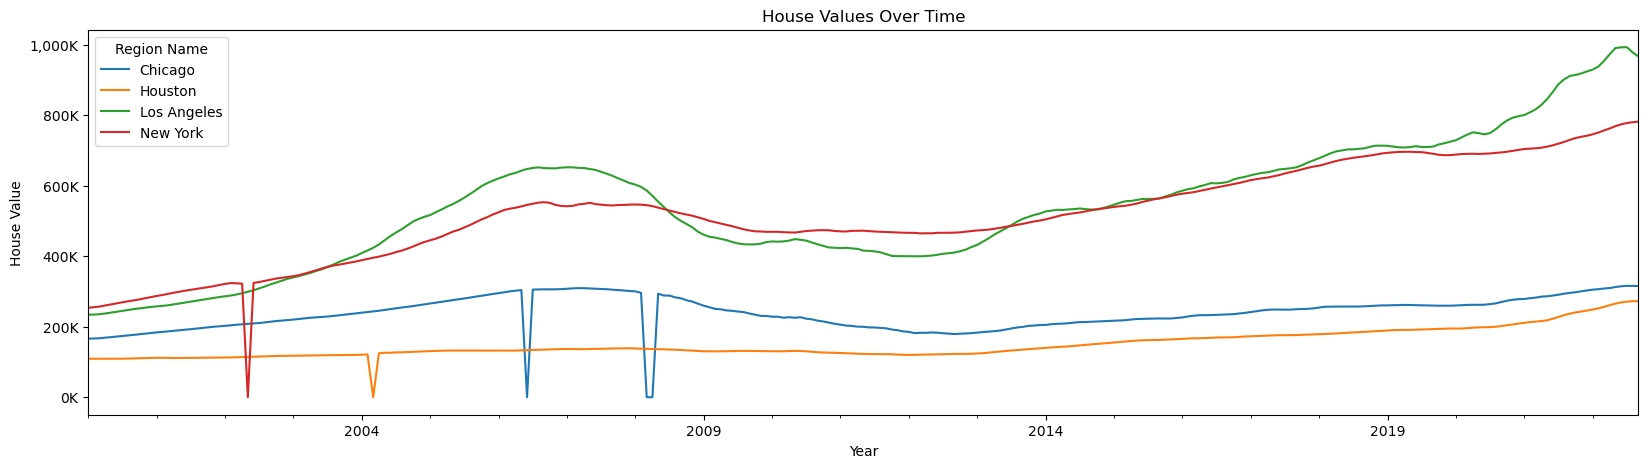

In [9]:
ax = unstack_df["HouseValue"].plot(figsize=(20, 5))

ax.set_title("House Values Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("House Value")

#Reformat the y-axis ticks to use thousands of dollars with a "K" at the end.
fmt_thousands = mticks.FuncFormatter(lambda x, pos: f"{x/1000:,.0f}K")
ax.yaxis.set_major_formatter(fmt_thousands)
plt.legend(title="Region Name");

1. <b>  Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [10]:
hv08_df = unstack_df.loc['2008','HouseValue']
hv08_df

RegionName,Chicago,Houston,Los Angeles,New York
DateTime,,,,
2008-01-31,300207.0,138208.0,603029.0,546538.0
2008-02-29,296063.0,137512.0,596635.0,546098.0
2008-03-31,0.0,136795.0,586065.0,544562.0
2008-04-30,0.0,136628.0,571226.0,541865.0
2008-05-31,293467.0,136228.0,554589.0,537685.0
2008-06-30,288495.0,135773.0,539622.0,533810.0
2008-07-31,288174.0,135392.0,524220.0,529211.0
2008-08-31,283199.0,134770.0,510520.0,525290.0
2008-09-30,280695.0,133932.0,500124.0,521347.0


In [11]:
high = hv08_df.tail(1).iloc[0].idxmax()
low = hv08_df.tail(1).iloc[0].idxmin()
print(f"{high} had the highest Typical Home Value at the end of 2008.")
print(f"{low} had the lowest Typical Home Value at the end of 2008.")

New York had the highest Typical Home Value at the end of 2008.
Houston had the lowest Typical Home Value at the end of 2008.


2. <b>  How much did the home values change from November 2008 to December 2008 (in dollars)?

In [12]:
hv_change = hv08_df.tail(2).diff().tail(1)

for region in hv_change.columns:
    change = hv_change[region][0]
    result =  f"increased by ${abs(change)}" if change > 0 else f"decreased by ${abs(change)}"
    
    print(f"Home values in {region} {result} between November 2008 and December 2008" )

Home values in Chicago decreased by $5753.0 between November 2008 and December 2008
Home values in Houston decreased by $964.0 between November 2008 and December 2008
Home values in Los Angeles decreased by $12611.0 between November 2008 and December 2008
Home values in New York decreased by $4458.0 between November 2008 and December 2008
